# Market Basket Analysis (MBA)
* mlxtend apriori: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/scikitlearn_tutorial
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

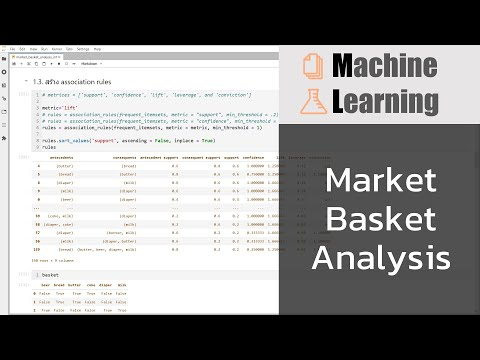

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Abbj3VzNtXQ', width=720, height=405)

In [2]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori, fpgrowth

%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 1.2.4
mlxtend   version: 0.18.0


In [4]:
pd.Timestamp.now()

Timestamp('2021-04-26 21:38:26.107651')

## read and transform basket data

```
trans,items
1,butter|bread|coke
2,bread|butter
3,beer|diaper|milk
4,beer|bread|butter|diaper|milk
5,coke|diaper|milk|bread
```

In [5]:
# data=pd.read_clipboard(sep=',')
# data

In [6]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [7]:
basket=data['items'].str.get_dummies('|')
basket[:5]

,beer,bread,butter,coke,diaper,milk
0,0,1,1,1,0,0
1,0,1,1,0,0,0
2,1,0,0,0,1,1
3,1,1,1,0,1,1
4,0,1,0,1,1,1


In [8]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   beer    5 non-null      int64
 1   bread   5 non-null      int64
 2   butter  5 non-null      int64
 3   coke    5 non-null      int64
 4   diaper  5 non-null      int64
 5   milk    5 non-null      int64
dtypes: int64(6)
memory usage: 368.0 bytes


In [9]:
basket=basket.astype(pd.SparseDtype("bool"))
basket[:10]

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [10]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   beer    5 non-null      Sparse[bool, False]
 1   bread   5 non-null      Sparse[bool, False]
 2   butter  5 non-null      Sparse[bool, False]
 3   coke    5 non-null      Sparse[bool, False]
 4   diaper  5 non-null      Sparse[bool, False]
 5   milk    5 non-null      Sparse[bool, False]
dtypes: Sparse[bool, False](6)
memory usage: 213.0 bytes


## สร้าง frequent_itemsets พร้อมระบุ min_support

In [11]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [12]:
# frequent_itemsets = apriori(basket, min_support = 0.05, use_colnames = True)
frequent_itemsets = fpgrowth(basket, min_support = 0.05, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
0,0.8,(bread)
3,0.6,(milk)
4,0.6,(diaper)
23,0.6,"(milk, diaper)"
6,0.6,"(butter, bread)"
1,0.6,(butter)
26,0.4,"(diaper, beer)"
24,0.4,"(bread, diaper)"
22,0.4,"(milk, bread)"
27,0.4,"(milk, beer)"


## สร้าง association rules

In [13]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
48,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
49,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
58,"(milk, diaper)",(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
43,"(milk, coke)","(bread, diaper)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
42,"(milk, bread)","(diaper, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
41,"(diaper, coke)","(milk, bread)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
40,"(bread, diaper)","(milk, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6


In [14]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [15]:
a='diaper'
b='beer'
rules[(rules['antecedents']=={a}) & (rules['consequents']=={b})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
54,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [16]:
rules[(rules['antecedents']=={b}) & (rules['consequents']=={a})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,(beer),(diaper),0.4,0.6,0.4,1.0,1.666667,0.16,inf


In [17]:
a='diaper'
b='beer'
rules[((rules['antecedents']=={a}) & (rules['consequents']=={b})) | 
      ((rules['antecedents']=={b}) & (rules['consequents']=={a}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
54,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [18]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


## เข้าใจวิธีการคำนวณค่า support, confidence, lift
ref: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

### evaluation metrices
$$
\begin{align}
support(A)&=\frac{\mbox{# A purchased}}{\mbox{# transactions}}; \mbox{จำนวนตะกร้าที่มีการซื้อ A เป็นกี่ % ของรายการทั้งหมด} \\\\
support(A, B)&=\frac{\mbox{# A purchased and # B purchased}}{\mbox{# transactions}}; \mbox{จำนวนตะกร้าที่มีการซื้อ A และ B พร้อมกันเป็นกี่ % ของรายการทั้งหมด}  \\\\
confidence(A\rightarrow B)&=\frac{support(A, B)}{support(A)}; \mbox{ likelihood of buying B when a A is bought, ในตระกร้าที่ซื้อ A มีกี่ตระกร้าที่ซื้อ B} \\\\
confidence(B\rightarrow A)&=\frac{support(A, B)}{support(B)}; \mbox{ likelihood of buying A when a B is bought, ในตระกร้าที่ซื้อ B มีกี่ตระกร้าที่ซื้อ A} \\\\
confidence(A\rightarrow B)&\neq confidence(B\rightarrow A) \\\\
lift(A\rightarrow B)&=\frac{support(A, B)}{support(A)\times support(B)}; \mbox{likelihood of buying a A and B together is x times more than the likelihood of just buying the B, ซื้อ A และ B พร้อมกันเป็นกี่เท่าของการซื้อเพียง B} \\\\
lift(A\rightarrow B)&=\frac{confidence(A\rightarrow B)}{support(B)}; \mbox{likelihood of buying a A and B together is x times more than the likelihood of just buying the B, ซื้อ A และ B พร้อมกันเป็นกี่เท่าของการซื้อเพียง B} \\\\
lift(A\rightarrow B)&=lift(B\rightarrow A)
\end{align}
$$

In [19]:
basket

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [20]:
len(basket)

5

### support

In [21]:
basket.sum()

beer      2
bread     4
butter    3
coke      2
diaper    3
milk      3
dtype: int32

In [22]:
basket['bread'].sum()

4

In [23]:
basket['bread'].sum()/len(basket)

0.8

In [24]:
support=basket.sum()/len(basket)
support.sort_values(ascending=False)

bread     0.8
butter    0.6
diaper    0.6
milk      0.6
beer      0.4
coke      0.4
dtype: float64

In [25]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
48,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
49,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
58,"(milk, diaper)",(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
43,"(milk, coke)","(bread, diaper)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
42,"(milk, bread)","(diaper, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
41,"(diaper, coke)","(milk, bread)",0.2,0.4,0.2,1.000000,2.500000,0.12,inf
40,"(bread, diaper)","(milk, coke)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6


In [26]:
# basket.loc[1, 'bread']=0
# support=basket.sum()/len(basket)
# support.sort_values(ascending=False)

### confidence

In [27]:
item_a='bread'
item_b='butter'
support_a=basket[item_a].sum()/len(basket)
support_b=basket[item_b].sum()/len(basket)
print(support_a, support_b)

0.8 0.6


In [28]:
a_and_b=len(basket[(basket[item_a]==1) & (basket[item_b]==1)])
a_and_b

3

In [29]:
support_a_and_b=a_and_b/len(basket)
support_a_and_b

0.6

In [30]:
conf_a_b=support_a_and_b/support_a
conf_a_b

0.7499999999999999

In [31]:
conf_b_a=support_a_and_b/support_b
conf_b_a

1.0

### lift (diaper -> beer)

In [32]:
# lift=conf_a_b/support_b
lift=support_a_and_b / (support_a * support_b)
lift

1.25

# filter item sets (SET column)

In [33]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [34]:
basket=data['items'].str.get_dummies('|').astype(pd.SparseDtype("bool"))
basket[:5]

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


In [35]:
frequent_itemsets = apriori(basket, min_support = 0.05, use_colnames = True)
# frequent_itemsets = fpgrowth(basket, min_support = 0.05, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
1,0.8,(bread)
2,0.6,(butter)
4,0.6,(diaper)
5,0.6,(milk)
19,0.6,"(milk, diaper)"
10,0.6,"(butter, bread)"
0,0.4,(beer)
11,0.4,"(bread, coke)"
25,0.4,"(milk, diaper, beer)"
31,0.4,"(milk, bread, diaper)"


In [36]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
59,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [37]:
rules.loc[0, 'antecedents']

frozenset({'diaper'})

In [38]:
rules[rules['antecedents'].apply(lambda s: len(s))==1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
61,(diaper),"(milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
60,(milk),"(diaper, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [39]:
rules[rules['antecedents'].apply(lambda s: len(s))==3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,"(butter, bread, diaper)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
120,"(bread, milk, diaper)",(coke),0.4,0.4,0.2,0.5,1.250000,0.04,1.2
121,"(milk, diaper, coke)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
122,"(bread, diaper, coke)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
123,"(milk, bread, coke)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
111,"(butter, milk, diaper)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
98,"(butter, milk, diaper)",(beer),0.2,0.4,0.2,1.0,2.500000,0.12,inf
99,"(butter, milk, beer)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
100,"(butter, diaper, beer)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
110,"(butter, milk, bread)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf


In [40]:
rules[(rules['antecedents'].apply(lambda s: len(s))==1) & (rules['lift'] > 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
109,(beer),"(butter, milk, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
156,(beer),"(butter, milk, bread, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
29,(beer),"(butter, milk)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
25,(beer),"(butter, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
85,(beer),"(butter, milk, bread)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
72,(beer),"(butter, bread, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6


In [41]:
rules[rules['antecedents']=={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
34,(diaper),"(milk, beer)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
53,(diaper),"(milk, bread)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
119,(diaper),"(butter, milk, bread)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
97,(diaper),"(milk, bread, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
108,(diaper),"(butter, milk, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
128,(diaper),"(milk, bread, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
17,(diaper),"(bread, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
24,(diaper),"(butter, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [42]:
rules[rules['antecedents']!={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
62,"(butter, bread, beer)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
60,(milk),"(diaper, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


In [43]:
rules[~(rules['antecedents']=={'diaper'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
62,"(butter, bread, beer)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
60,(milk),"(diaper, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


In [44]:
rules[rules['antecedents']=={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(diaper, beer)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
106,"(diaper, beer)","(butter, milk)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
94,"(diaper, beer)","(milk, bread)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2
151,"(diaper, beer)","(butter, milk, bread)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6


In [45]:
rules[rules['antecedents']!={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
59,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [46]:
# contains at least (diaper AND beer) OR others
# rules[rules['antecedents'] == {'beer', 'diaper'}] # equal
rules[rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,"(diaper, beer)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
100,"(butter, diaper, beer)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
106,"(diaper, beer)","(butter, milk)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
94,"(diaper, beer)","(milk, bread)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2
151,"(diaper, beer)","(butter, milk, bread)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
144,"(butter, diaper, beer)","(milk, bread)",0.2,0.4,0.2,1.0,2.500000,0.12,inf
133,"(butter, bread, beer, diaper)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
134,"(milk, bread, beer, diaper)",(butter),0.2,0.6,0.2,1.0,1.666667,0.08,inf
136,"(butter, milk, diaper, beer)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
139,"(bread, beer, diaper)","(butter, milk)",0.2,0.2,0.2,1.0,5.000000,0.16,inf


In [47]:
# not contains at least (diaper AND beer) OR others
rules[~rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
5,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
59,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(milk, coke)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [48]:
# contains diaper OR beer
rules[rules['antecedents'].str.join(',').str.contains('diaper|beer')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
1,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
35,(beer),"(milk, diaper)",0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
62,"(butter, bread, beer)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
61,(diaper),"(milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(diaper, coke)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
